In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import set_proxy
from nltk import word_tokenize



C:\Users\thinguyen\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [15]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [3]:
'''configuration'''
# set_proxy(proxy = 'http://cache.aut.ac.nz:3128')
sns.set_style("darkgrid")
data_path = 'C:/Users/thinguyen/Desktop/PHD Semestor 2/Virtual_PC/bk/Python code/Doc2Vec_API_Mo/'


In [4]:
#This loads our raw data, the crawled data from ProgrammableWeb 
df = pd.read_csv(data_path+'mashup_rawdata.csv', usecols=[0,1,2,3,4,5,6], \
                 names=['id','name','category','tag','date','desc','api'])
df2 = pd.read_csv(data_path+'api_rawdata.csv', usecols=[0,1,2,3,4,5], \
                 names=['id','name','category','tag','date','desc'])

In [5]:
df[df.date.astype(int) < 2016]

,id,name,category,tag,date,desc,api
24,25,Say it in Bacon,Visualizations,"['Visualizations', 'Food', 'Humor']",2013.4,make your own custom designs all with bacon .....,['Zazzle']
25,26,oveboxer,Search,"['Search', 'Recommendations']",2012.4,Moveboxer is the best way to find a reputable ...,"['Yelp Fusion', 'Scribd Platform']"
26,27,Eattr,Food,"['Food', 'Restaurants']",2014.8,Eattr is an application to find local restaura...,['Zomato Foodie Index']
28,29,Cartoonize My Pet,Pets,"['Pets', 'Humor', 'Humor']",2013.4,Create cute cartoon pets and place them on all...,['Zazzle']
29,30,ArgenCitie,Geography,"['Geography', 'Countries', 'Events', 'Search',...",2014.8,ArgenCities is a web app that delivers a Googl...,"['Google Maps', 'Google Maps Places', 'Google ..."
31,32,Hycke,Music,"['Music', 'Movies', 'Search', 'Recommendations']",2012.4,"Hycke helps you to discover what movie, tv sho...","['Last.fm', 'TheTVDB.com']"
32,33,WatchCount.com,eCommerce,"['eCommerce', 'Search']",2012.4,WatchCount.com is an award-winning collection ...,"['eBay', 'Blogama (IPInfoDB)', 'eBay Finding',..."
33,34,"Webtomap: news, videos and photos on a m",Travel,"['Travel', 'Visualizations', 'Social', 'Mappin...",2013.4,On Webtomap you can post and discuss your loca...,"['Google Maps', 'WordPress.org']"
34,35,Feedly iOS,News Services,"['News Services', 'Blogging', 'Notes', 'Person...",2014.8,The feedly app aggregates a user's favorite si...,"['feedly', 'Facebook', 'Twitter', 'Google Plus..."
36,37,Our Louvre,Museums,"['Museums', 'Museums', 'Art']",2013.3,OurLouvre presents a large part of the exhibit...,"['Flickr', 'Google Maps', 'Wikipedia']"


In [6]:
df= df.sort_values('date', ascending=True)
df

,id,name,category,tag,date,desc,api
6253,6254,USA Hot Spring,Mapping,['Mapping'],2005.1,Shows you where 1661 hot springs are in the US...,['Google Maps']
6299,6300,Sport,Mapping,"['Mapping', 'Sports', 'England']",2005.1,Lets you find premiership soccer news by team ...,"['BBC', 'Google Maps']"
6236,6237,2RealEstate Auction,Mapping,"['Mapping', 'Real Estate', 'Auctions']",2005.1,Live eBay Real Estate listings with Google Map...,"['eBay', 'Google Maps']"
6297,6298,UK Traveldat,Mapping,"['Mapping', 'Travel', 'England']",2005.1,Travel advisories in the UK on a Google Map (w...,"['BBC', 'Google Maps']"
6238,6239,Williamsburger Community Guide,Mapping,"['Mapping', 'Food', 'New York City']",2005.1,Google Maps mashup helps you find where the hi...,['Google Maps']
6295,6296,Truli,Mapping,"['Mapping', 'Real Estate']",2005.1,Search real estate listings at Trulia and see ...,['Google Maps']
6240,6241,Slice NY Pizz,Mapping,"['Mapping', 'Food', 'New York City']",2005.1,Links you to pizzeria reviews at America’s Fav...,['Google Maps']
6293,6294,viviram,Mapping,"['Mapping', 'Real Estate', 'Travel']",2005.1,A housing listings website for all cities of t...,"['Google Maps', 'RapLeaf']"
6242,6243,NYC Marathon Course,Mapping,"['Mapping', 'Sports', 'New York City']",2005.1,See the course of the 2005 NYC Marathon. From ...,['Google Maps']
6291,6292,TicT,eCommerce,"['eCommerce', 'Messaging']",2005.1,"An Amazon AWS site. Has SMS feature, library l...",['Amazon Product Advertising']


In [10]:
#FOR PLOTS
#TRAINING SETS and TEST SET
train_df = df[df['date'].astype(int) < 2016]  # for data before 2016
validate_df= df[df['date'].astype(int) >= 2016]   #for data after 2016

In [11]:
np.shape(train_df), np.shape(validate_df)

((6245, 7), (95, 7))

In [10]:
#Whole set
API_count= list(df['api'])
APIs=[int]
for items in API_count:
    if len(items)!=0:
        l=list(items)
        APIs.append(l.count(',')+1)
print ("Number of APIs in the whole dataset: ")
print(APIs[:5])
    
#Training set
API_count_t= list(train_df['api'])
APIs_t=[int]
for items in API_count_t:
    if len(items)!=0:
        l=list(items)
        APIs_t.append(l.count(',')+1)
print ("Number of APIs in training set: ")
print(APIs_t[:5])
    
#Validating set
API_count_v= list(validate_df['api'])
APIs_v=[int]
for items in API_count_v:
    if len(items)!=0:
        l=list(items)
        APIs_v.append(l.count(',')+1)
print ("Number of APIs in validating set: ")
print(APIs_v[:5])
    
###################apis

#count_Tr_APIs_df=Tr_APIs_df.count
print("train_df")
#print(train_df)
print("Length df: ", len(df))
print("Length train_df: ", len(train_df))
print("Length validate_df: ", len(validate_df))
print("Length APIs: ", len(APIs))


Number of APIs in the whole dataset: 
[<class 'int'>, 1, 2, 2, 2]
Number of APIs in training set: 
[<class 'int'>, 1, 2, 2, 2]
Number of APIs in validating set: 
[<class 'int'>, 1, 1, 1, 1]
train_df
Length df:  6340
Length train_df:  6245
Length validate_df:  95
Length APIs:  6341


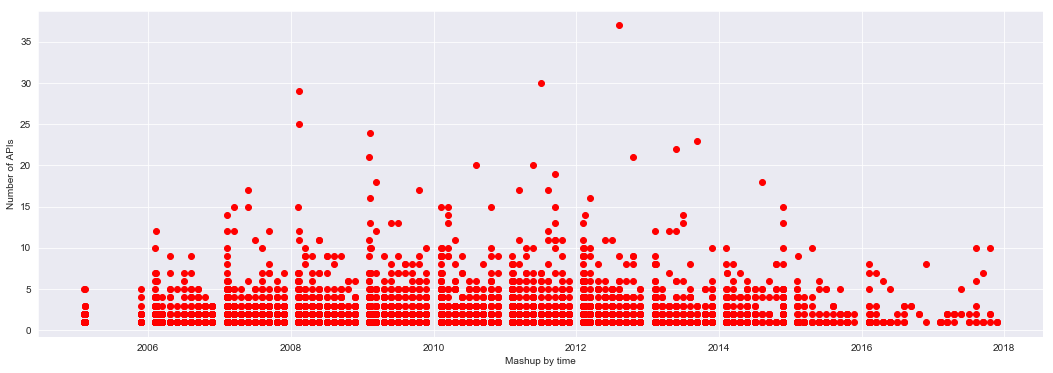

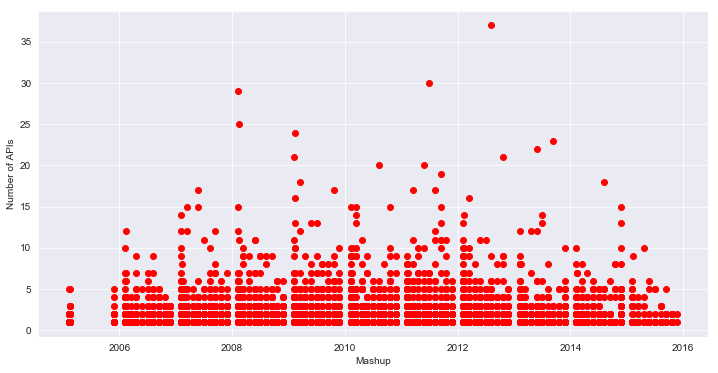

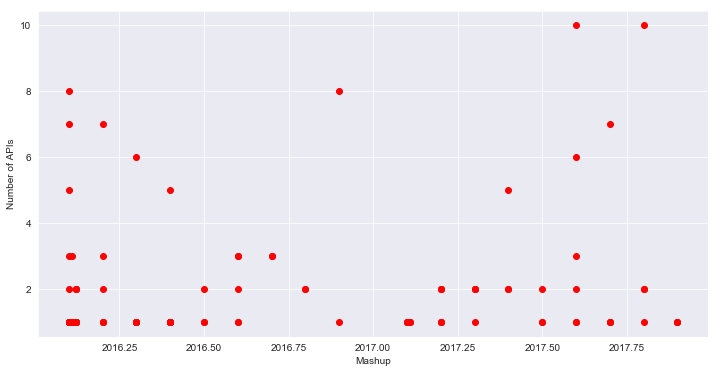

In [11]:
# Show graph
import numpy as n
import matplotlib.pyplot as plt
y_a= APIs[1:]
x_a= df['date']
y_a_t= APIs_t[1:]
x_a_t= train_df['date']
y_a_v= APIs_v[1:]
x_a_v= validate_df['date']
plt.figure(figsize=(18,6))
plt.plot(x_a,y_a, 'ro')
plt.ylabel('Number of APIs')
plt.xlabel('Mashup by time')
plt.show()
plt.figure(figsize=(12,6))
plt.plot(x_a_t, y_a_t, 'ro')
plt.ylabel('Number of APIs')
plt.xlabel('Mashup')
plt.show()
plt.figure(figsize=(12,6))
plt.plot(x_a_v, y_a_v, 'ro')
plt.ylabel('Number of APIs')
plt.xlabel('Mashup')
plt.show()


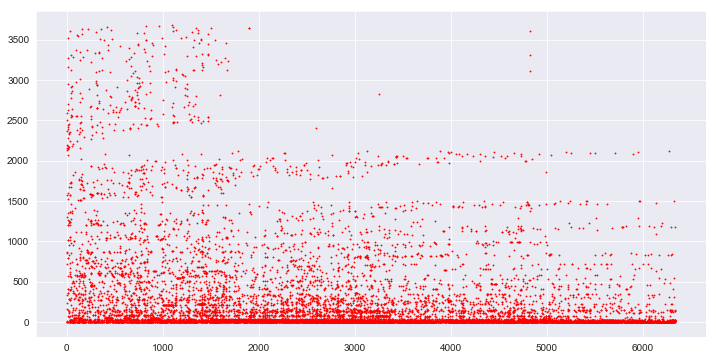

In [12]:
#PLOT
invoc_df = pd.read_csv(data_path+'invocation_data.csv', usecols=[0,1,2], \
                 names=['Mashup','API','value'])
x_i= invoc_df['Mashup']
y_i= invoc_df['API']
plt.figure(figsize=(12,6))
#plt.plot(x_i, y_i, 'g^')
#plt.ylabel('API')
#plt.xlabel('Mashup')
plt.scatter(x_i,y_i, s=0.5, c='r', marker='D', alpha=1)
plt.show()


In [24]:
df['concat'] = df['id'].astype(str)+'    '+df['desc'].fillna('')
df2['concat'] = df2['id'].astype(str)+'    '+df2['desc'].fillna('')

def initial_clean(text):
    """
    Function to clean text of websites, email addresess and any punctuation
    We also lower case the text
    """
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)", " ", text)
    text = re.sub("/", " ", text)
    text = re.sub("-", " ", text)
    text = re.sub("\'", " ", text)
    text = re.sub(",", " ", text)
    text = re.sub("[^a-zA-Z ]", " ", text)
    text = text.lower() # lower case the text
    #text = nltk.word_tokenize(text)
    return text
stop_words = stopwords.words('english')
def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    return [word for word in word_tokenize(text) if word not in stop_words]
more_words = ['also','a','an','the','but','if','and','or','as','until','because',\
              'while','of','at','by','for','with','about','against','between','into',\
              'through','during','before','after','above','below','to','from','up',\
              'down','in','out','on','off','over','under','again','further',\
              'then','once','here','there','when','where','why','how','all','any',\
              'both','each','few','more','most','other','some','such','no','nor','not',\
              'only','own','same','so','than','too','will','just','don','should','now'\
              'me','my','myself','we','our','ours','ourselves','you','your','yours',\
              'yourself','yourselves','he','him','his','himself','she','her','hers',\
              'herself','it','its','itself','they','them','their','theirs','themselves',\
              'what','which','who','whom','this','that','these','those','am','is'\
              'are','was','were','be','been','being','have','has','had','having','do','does','did','doing']
stop_words = stop_words + more_words

text = df['concat']
text = text.apply(initial_clean) 
text = text.apply(remove_stop_words) #this returns tokenized strings

#so we have to detokenize again...  
text = text.astype(str)
text = text.apply(initial_clean) 


df['concat'] = text

########################################################
text = df2['concat']
text = text.apply(initial_clean) 
text = text.apply(remove_stop_words) #this returns tokenized strings

#so we have to detokenize again...  
text = text.astype(str)
text = text.apply(initial_clean) 


df2['concat'] = text

In [25]:
#PREPROCESSING FOR DOC2VEC
df['concat'] = df['id'].astype(str)+'    '+df['concat'].fillna('')
df2['concat'] = df2['id'].astype(str)+'    '+df2['concat'].fillna('')
list_df = df['concat'].fillna('')
list_df2 = df2['concat'].fillna('')
list_df= list_df.values
list_df2= list_df2.values
print(list_df[:3])
print("_______________________________________________________________________")
print(list_df2[:3])
print('Number of mashups:', len(df))
print('Number of apis:', len(df2))

['6254      shows    hot    springs    us    noaa    data    google    maps  '
 '6300      lets    find    premiership    soccer    news    team    location    via    google    maps    bbc    backstage    data  '
 '6237      live    ebay    real    estate    listings    google    maps    includes    usa    top    bid    count    list    along    regional    top    lists  ']
_______________________________________________________________________
['1      api    longer    available    google    maps    services    split    multiple    apis    including    static    maps    api    street    view    image    api    directions    apis    distance    matrix    api    elevation    api    geocoding    api    geolocation    api    places    api    roads    api    time    zone    api    page    maintained    purely    historical    research    purposes    google    maps    api    allow    embedding    google    maps    onto    web    pages    outside    developers    using    simple    javascrip

In [26]:
for i in range (5):
    print(list_df[i][0:4])

6254
6300
6237
6298
6239


In [27]:
#Import all the dependencies for Doc2Vec

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[int(list_df[i][0:4])]) for i, _d in enumerate(list_df)]
tagged_data2 = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[int(list_df2[i][0:4])]) for i, _d in enumerate(list_df2)]

In [28]:
print(tagged_data[6254])
print("_____________________________________________________________________")
print(tagged_data2[0])

TaggedDocument(['113', 'get', 'digitalhealth', 'mashup', 'enables', 'clinical', 'trial', 'sponsor', 'clinical', 'research', 'organization', 'academic', 'researcher', 'investigators', 'set', 'study', 'select', 'wearables', 'devices', 'start', 'receiving', 'data', 'study', 'participants', 'participants', 'click', 'invite', 'link', 'sign', 'consent', 'provide', 'authorization', 'device', 'data', 'accessed', 'get', 'digitalhealth', 'platform', 'provides', 'study', 'teams', 'ability', 'export', 'data', 'spreadsheet', 'visualize', 'directly', 'push', 'data', 'clinical', 'trial', 'management', 'systems', 'medidata', 'openclinical', 'mashup', 'features', 'insightful', 'analytics', 'hipaa', 'compliant', 'security', 'normalized', 'intelligent', 'data', 'retrieval', 'intergration', 'ehr', 'ctms'], [113])
_____________________________________________________________________
TaggedDocument(['1', 'api', 'longer', 'available', 'google', 'maps', 'services', 'split', 'multiple', 'apis', 'including', 's

In [29]:
#Doc2Vec training for Mashup description
max_epochs = 20
vec_size = 100
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
                #epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
Model Saved


In [30]:
#Doc2Vec training for APIs description
max_epochs = 20
vec_size = 100
alpha = 0.025

model2 = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model2.build_vocab(tagged_data2)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model2.train(tagged_data2,
                total_examples=model2.corpus_count,
                epochs=model2.epochs)
                #epochs=model.iter)
    # decrease the learning rate
    model2.alpha -= 0.0002
    # fix the learning rate, no decay
    model2.min_alpha = model2.alpha

model2.save("d2v.model2")
print("Model2 Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
Model2 Saved


In [31]:
# Test the model training above work or not: Calculate similarity

from gensim.models.doc2vec import Doc2Vec
model= Doc2Vec.load("d2v.model")
#to find the vector of a mashup which is not in training data
test_data = word_tokenize("Goodneighbor Blockchain ['Artificial Intelligence', 'Social'] Goodneighbor is a platform that allows you to define, run and manage Twitter avatars, totally autonomous Twitter identities that manage their own Twitter accounts, concerned with any subject matter and interested in any topic. ['Twitter', 'Bit.ly']".lower())
v1 = model.infer_vector(test_data)
#print("V1_infer", v1)

# to find most similar APIs using tags
similar_doc = model.docvecs.most_similar(1)
similar_doc


[(3517, 0.5205974578857422),
 (1480, 0.5129699110984802),
 (5747, 0.5050524473190308),
 (440, 0.49541929364204407),
 (6231, 0.49502089619636536),
 (3659, 0.481065571308136),
 (860, 0.47963887453079224),
 (3852, 0.4746682047843933),
 (3915, 0.46544432640075684),
 (1957, 0.4653436541557312)]

In [32]:
print(model.docvecs[1])
print("____________________________________________________________________")
print(model2.docvecs[1])

[ 0.9429971  -0.12975512  1.6190765   0.43206322 -0.79929    -0.49123707
  0.7374302  -0.5688108   3.2304666   1.907316    0.6508725   1.0494826
 -0.42200938  1.1542002   0.04300576  0.7159563  -0.114157    0.97632176
  3.4320488   0.9528261   0.1503939  -0.10827435 -0.25089857  2.1072783
 -3.2201452  -1.4081703   1.0819544  -0.70653826  2.8954     -0.32983118
 -1.2539093  -0.56439614 -2.6137643   4.6326637  -1.3764622   2.4722166
 -0.99591684 -1.3559778  -1.7410928  -1.0446883  -1.1682392   1.4993789
 -1.2744497   1.1712574   2.2937348   2.1344109  -1.6098965  -0.77374876
  0.9522304  -1.134673   -2.9161344  -1.5114015  -0.17232643  0.91901666
  0.1363331  -1.1953673   0.8656067   1.1690601  -0.66654384  1.3379062
 -0.8093158  -1.1051419   2.2213504  -2.0954928  -1.2322      3.4349973
 -2.7643728  -3.819333    2.3317692   1.8988187  -0.08208263  1.0396223
  2.4025114  -0.4328912   1.2802088  -0.48265865  4.378279   -1.3256364
  1.509297    2.5460982  -0.8158889   2.426886   -0.9606879

In [33]:
#Finding similarity between 2 documents s_ij and write to csv
import pandas as pd
from gensim.models import doc2vec
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity
def sim(id_i, id_j):
    veci=model.docvecs[id_i]
    vecj=model2.docvecs[id_j]
    #similarity = cosine_similarity(veci, vecj)
    #similarity = spatial.distance.cosine(veci, vecj)
    similarity = abs(1-spatial.distance.cosine(veci, vecj))
    return similarity

# test
print(sim(6254,1))




0.19825021922588348


In [34]:
invo_tbl = pd.read_csv(data_path+'invocation_data.csv', usecols=[0,1,2], \
                 names=['Mashup','API','Value'])
invo_tbl.head(5)

,Mashup,API,Value
0,2.0,2374.0,1
1,3.0,1579.0,1
2,4.0,2129.0,1
3,5.0,724.0,1
4,6.0,2160.0,1


In [35]:
invo_tbl['Mashup_id']=invo_tbl['Mashup'].astype(int)
invo_tbl['API_id']=invo_tbl['API'].astype(int)
invo_tbl.head(5)

,Mashup,API,Value,Mashup_id,API_id
0,2.0,2374.0,1,2,2374
1,3.0,1579.0,1,3,1579
2,4.0,2129.0,1,4,2129
3,5.0,724.0,1,5,724
4,6.0,2160.0,1,6,2160


In [36]:
invo_tbl['Mashup_id']=invo_tbl['Mashup'].astype(int)
invo_tbl['API_id']=invo_tbl['API'].astype(int)
subset = invo_tbl[['Mashup_id', 'API_id']] 
tuples = [tuple(x) for x in subset.values] 
tuples[0:5]

[(2, 2374), (3, 1579), (4, 2129), (5, 724), (6, 2160)]

In [37]:
invo_tbl['Similarity']= [sim (i,j) for (i,j) in tuples]
invo_tbl.head(5)

,Mashup,API,Value,Mashup_id,API_id,Similarity
0,2.0,2374.0,1,2,2374,0.141950
1,3.0,1579.0,1,3,1579,0.083018
2,4.0,2129.0,1,4,2129,0.097671
3,5.0,724.0,1,5,724,0.128333
4,6.0,2160.0,1,6,2160,0.230452


In [38]:
invo_tbl.to_csv(data_path+'invocation_data_2_noSW.csv', encoding='utf-8', index=False, header=False)


In [39]:
#IMPORT DATA AND PREPROCESSING FOR MAIN MODELS LEARNING: ConRel and APIRel

import pandas as pd
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
from sklearn.preprocessing import MinMaxScaler
#import recmetrics
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import time

#-------------------------
# LOAD AND PREP THE DATA
#-------------------------

#The raw mashup-API dataset contains the tuple (mashup_id, API_id, value). 
#A sparse matrix of the dataset is derived after running this code.

raw_data = pd.read_csv(data_path+'invocation_data_2_noSW.csv', \
            encoding='utf-8', usecols=[0,1,2,5], names=['mashup','api','value','similarity'])
data = raw_data.copy()

In [40]:
#drop duplicate rows
data.drop_duplicates(inplace=True)

#modify the float values of the IDs to be int
data.mashup = data.mashup.astype(int)
data.api = data.api.astype(int)

In [41]:
data.api.head(5)

0    2374
1    1579
2    2129
3     724
4    2160
Name: api, dtype: int32

In [42]:
# Convert api names into numerical IDs
data['mashup_id'] = data['mashup'].astype("category").cat.codes
data['api_id'] = data['api'].astype("category").cat.codes

In [43]:
data.head(5)

,mashup,api,value,similarity,mashup_id,api_id
0,2,2374,1,0.141950,0,899
1,3,1579,1,0.083018,1,695
2,4,2129,1,0.097671,2,875
3,5,724,1,0.128333,3,334
4,6,2160,1,0.230452,4,878


In [44]:
# Create a lookup frame so we can get the original ids back later.
mashup_lookup = data[['mashup_id', 'mashup']].drop_duplicates()
mashup_lookup['mashup_id'] = mashup_lookup.mashup_id.astype(int)

api_lookup = data[['api_id', 'api']].drop_duplicates()
api_lookup['api_id'] = api_lookup.api_id.astype(int)
api_lookup[api_lookup.api_id==899]

,api_id,api
0,899,2374


In [45]:
# Create lists of all mashups, apis and values
mashups = list(np.sort(data.mashup_id.unique()))
apis = list(np.sort(data.api_id.unique()))
values = list(data.value)
similarity= list(data.similarity)

# Get the rows and columns for our new matrix
rows = data.mashup_id.astype(int)
cols = data.api_id.astype(int)
len(apis)

1170

In [46]:
# Contruct a sparse matrix for our mashups and apis containing the preference score(at the moment the sim)
data_sparse = sparse.csr_matrix((values, (rows, cols)), shape=(len(mashups), len(apis)))
den_data_sparse = data_sparse.toarray()
# den_data_sparse[1][2:10]

In [47]:
# similarity matrix shape: |mashups|x|apis|
sim_matrix= sparse.csr_matrix((similarity, (rows, cols)), shape=(len(mashups), len(apis)))
matrix_size = data_sparse.shape[0]*data_sparse.shape[1] # Number of possible interactions in the matrix
(len(mashups), len(apis)), matrix_size

((5691, 1170), 6658470)

In [48]:
num_interactions = len(data_sparse.nonzero()[0]) # Number of mashup-api interactions
sparsity = 100*(1 - (len(data)/matrix_size))

den_sim= sim_matrix.toarray()

In [ ]:
# a parallel version of the code in the next block
from joblib import Parallel, delayed
import multiprocessing
import itertools

range_api = range(10) 
range_mashup = range(10)

def processInput(i,j):
    return i * j

num_cores = multiprocessing.cpu_count()

results = Parallel(n_jobs=num_cores)(delayed(sim)(i,j) for i, j in itertools.product(range_api, range_mashup))

print(results)

In [49]:
#ONLY RUN 1 TIME
#Calculate similarity between mashup-api

inrow=0
for k in mashups:
    incol=0
    for l in apis:
        den_sim[inrow][incol]=sim(k+1,l+1)
        #print(den_sim[inrow][incol])
        incol=incol+ 1
    inrow= inrow +1

den_sim[:5][:5]


#print("Matrix size: %d x %d = %d" % (len(mashups),len(apis),matrix_size))
#print("Number of mashup-api interactions: ",num_interactions) #this is equivalent to the length of data 
#print("Sparsity:", sparsity)


array([[0.02409968, 0.04347625, 0.24068308, ..., 0.10612242, 0.12161504,
        0.07846302],
       [0.25739515, 0.31833094, 0.25108016, ..., 0.10941755, 0.01165129,
        0.11422423],
       [0.11944552, 0.13871822, 0.12472216, ..., 0.11408273, 0.14704631,
        0.16546912],
       [0.15616383, 0.03766561, 0.09510989, ..., 0.13510959, 0.2238453 ,
        0.17737153],
       [0.19180048, 0.10666198, 0.18270449, ..., 0.12387721, 0.21794228,
        0.21975203]])

In [50]:
#(ONLY RUN 1 TIME) CALCULATE THE API SIMILARITY MATRIX

api_sim_matrix= sparse.csr_matrix((similarity, (cols, cols)), shape=(len(apis), len(apis)))
#print(api_sim_matrix)
api_sim=api_sim_matrix.toarray()

print(api_sim)
inrow=0
for i in apis:
    incol=0
    for k in apis:
        api_sim[inrow][incol]=sim(i+1,k+1)
        incol=incol+1
    inrow=inrow +1
print(api_sim[:10][:10])


                
                
#api_f_matrix= sparse.csr_matrix((similarity, (cols, cols)), shape=(len(apis), len(apis)))
#api_f=api_f_matrix.toarray()




[[3.39415355e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.03504041e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.98233997e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.13154054e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.57121265e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.27353594e-01]]
[[0.02409968 0.04347625 0.24068308 ... 0.10612242 0.12161504 0.07846302]
 [0.25739515 0.31833094 0.25108016 ... 0.10941755 0.01165129 0.11422423]
 [0.11944552 0.13871822 0.12472216 ... 0.11408273 0.14704631 0.16546912]
 ...
 [0.07876381 0.2557444  0.22016136 ... 0.08400664 0.00454499 0.09756741]
 [0.15875265 0.21495968 0.12854333 ... 0.02244294 0.16043535 0.13611802]
 [0.17649931 0.12128402 0.2572

In [22]:
# ONLY RUn 1 TIME 
#Calculate the frequency of co-invocation. This step takes long time but I only run 1 time and write the result to csv.
#Nexr time running, I just import the csv again

api_f=np.zeros((len(apis),len(apis)))

for k in mashups:
    for l in apis:
        for h in apis:
            if (den_data_sparse[k][l]==1) and (den_data_sparse[k][h]==1):
                api_f[l][h]+=1
                print(api_f[l][h])


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
2.0
1.0
1.0
2.0
2.0
2.0
2.0
1.0
1.0
2.0
2.0
2.0
2.0
1.0
1.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


2.0
3.0
3.0
3.0
3.0
25.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
34.0
2.0
1.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
3.0
1.0
2.0
35.0
4.0
1.0
1.0
2.0
3.0
1.0
36.0
2.0
37.0
2.0
1.0
2.0
3.0
1.0
1.0
1.0
1.0
38.0
1.0
5.0
1.0
19.0
2.0
5.0
2.0
22.0
4.0
4.0
4.0
4.0
1.0
26.0
14.0
1.0
14.0
23.0
1.0
1.0
1.0
1.0
2.0
3.0
3.0
5.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
20.0
1.0
1.0
2.0
39.0
3.0
3.0
4.0
40.0
27.0
5.0
2.0
1.0
5.0
21.0
2.0
1.0
2.0
2.0
5.0
1.0
1.0
1.0
1.0
1.0
41.0
1.0
1.0
3.0
1.0
22.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
42.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
43.0
3.0
1.0
3.0
28.0
1.0
1.0
1.0
2.0
1.0
1.0
44.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
24.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
45.0
2.0
2.0
3.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
59.0
89.0
4.0
6.0
4.0
4.0
1.0
6.0
1.0
7.0
60.0
1.0
1.0
2.0
1.0
1.0
1.0
60.0
27.0
7.0
5.0
27.0
53.0
8.0
5.0
7.0
8.0
12.0
4.0
5.0
5.0
4.0
6.0
2.0
61.0
90.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
61.0
1.0
62.0
10.0
28.0
1.0
4.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
10.0
43.0
7.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
28.0
7.0
54.0
1.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
5.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
2.0
2.0
1.0
15.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
6.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1

121.0
1.0
4.0
1.0
122.0
14.0
5.0
14.0
74.0
7.0
5.0
7.0
23.0
63.0
1.0
1.0
1.0
21.0
1.0
2.0
1.0
1.0
3.0
1.0
1.0
2.0
1.0
5.0
1.0
1.0
1.0
1.0
1.0
23.0
1.0
1.0
1.0
123.0
124.0
4.0
1.0
1.0
2.0
64.0
4.0
2.0
4.0
10.0
4.0
2.0
4.0
6.0
80.0
36.0
6.0
1.0
1.0
1.0
1.0
36.0
75.0
5.0
1.0
1.0
1.0
1.0
6.0
5.0
16.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
125.0
126.0
7.0
2.0
7.0
17.0
1.0
2.0
1.0
6.0
2.0
1.0
1.0
1.0
65.0
14.0
14.0
76.0
127.0
15.0
6.0
7.0
15.0
6.0
15.0
81.0
15.0
8.0
37.0
9.0
6.0
15.0
66.0
9.0
15.0
6.0
7.0
8.0
9.0
20.0
5.0
4.0
15.0
37.0
15.0
5.0
77.0
8.0
6.0
9.0
6.0
4.0
8.0
24.0
82.0
16.0
9.0
16.0
67.0
10.0
9.0
10.0
21.0
2.0
2.0
1.0
1.0
1.0
5.0
83.0
128.0
13.0
2.0
1.0
2.0
3.0
1.0
1.0
1.0
1.0
3.0
78.0
6.0
6.0
18.0
129.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
130.0
1.0
68.0
2.0
7.0
3.0
2.0
2.0
7.0
1.0
1.0
1.0
7.0
1.0
25.0
2.0
1.0
3.0
1.0
2.0
4.0
1.0
2.0
1.0
1.0
1.0
2.0
8.0
131.0
7.0
7.0
9.0
1.0
1.0
1.0
1.0
3.0
1.0

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
89.0
15.0
4.0
3.0
3.0
2.0
15.0
32.0
7.0
4.0
1.0
3.0
4.0
7.0
9.0
5.0
1.0
2.0
3.0
4.0
5.0
8.0
1.0
2.0
3.0
1.0
1.0
1.0
6.0
1.0
2.0
3.0
2.0
2.0
1.0
3.0
189.0
33.0
112.0
8.0
2.0
1.0
2.0
2.0
9.0
2.0
1.0
1.0
2.0
2.0
1.0
2.0
1.0
1.0
2.0
2.0
1.0
113.0
190.0
5.0
1.0
2.0
114.0
3.0
6.0
191.0
3.0
115.0
1.0
1.0
1.0
4.0
5.0
18.0
116.0
6.0
192.0
193.0
25.0
4.0
25.0
117.0
11.0
4.0
11.0
16.0
194.0
102.0
3.0
8.0
3.0
26.0
1.0
8.0
1.0
19.0
7.0
195.0
196.0
1.0
1.0
3.0
8.0
90.0
19.0
4.0
4.0
7.0
13.0
9.0
30.0
3.0
3.0
12.0
91.0
16.0
16.0
33.0
1.0
1.0
1.0
3.0
118.0
20.0
13.0
11.0
20.0
92.0
13.0
8.0
13.0
13.0
31.0
5.0
11.0
8.0
5.0
33.0
10.0
197.0
4.0
3.0
1.0
4.0
4.0
1.0
1.0
3.0
1.0
4.0
1.0
1.0
1.0
1.0
5.0
198.0
4.0
1.0
2.0
4.0
9.

2.0
6.0
4.0
1.0
2.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
1.0
2.0
6.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
3.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
9.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
12.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0

1.0
4.0
270.0
44.0
11.0
2.0
1.0
4.0
2.0
1.0
1.0
1.0
1.0
1.0
11.0
130.0
2.0
1.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
17.0
4.0
1.0
5.0
3.0
1.0
3.0
1.0
1.0
1.0
1.0
4.0
7.0
1.0
6.0
5.0
1.0
4.0
1.0
1.0
4.0
3.0
1.0
1.0
6.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
5.0
6.0
1.0
16.0
6.0
1.0
4.0
1.0
1.0
1.0
1.0
3.0
5.0
1.0
6.0
10.0
1.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
4.0
1.0
4.0
4.0
1.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
112.0
2.0
51.0
131.0
12.0
4.0
1.0
1.0
12.0
27.0
1.0
1.0
1.0
4.0
1.0
16.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
4.0
2.0
173.0
32.0
65.0
1.0
1.0
32.0
113.0
23.0
1.0
1.0
65.0
23.0
132.0
1.0
2.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
2.0
1.0
2.0
271.0
35.0
13.0
13.0
23.0
35.0
174.0
33.0
18.0
66.0
13.0
33.0
114.0
17.0
24.0
13.0
18.0
17.0
45.0
12.0
23.0
66.0
24.0
12.0
133.0
52.0
3.0
3.0
9.0
32.0
1.0
1.0
1.0
1.0
10.0
1.0
1.0
1.0
1.0
11.0
1.0
1.0
1.0
1.0
3.0
1.0
272.0
5.0
5.0
6.0
273.0
36.0
24.0
36.0
1

321.0
45.0
28.0
45.0
211.0
78.0
28.0
78.0
157.0
322.0
46.0
15.0
15.0
29.0
17.0
3.0
1.0
1.0
1.0
1.0
1.0
46.0
212.0
37.0
20.0
79.0
18.0
15.0
2.0
1.0
1.0
1.0
1.0
15.0
37.0
124.0
19.0
26.0
5.0
3.0
4.0
1.0
2.0
1.0
1.0
15.0
20.0
19.0
53.0
15.0
6.0
2.0
3.0
1.0
2.0
1.0
1.0
29.0
79.0
26.0
15.0
158.0
16.0
15.0
2.0
1.0
1.0
1.0
1.0
17.0
18.0
5.0
6.0
16.0
61.0
4.0
1.0
1.0
1.0
1.0
1.0
3.0
15.0
3.0
2.0
15.0
4.0
30.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
4.0
3.0
2.0
1.0
1.0
4.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
159.0
1.0
1.0
4.0
106.0
58.0
58.0
66.0
213.0
323.0
2.0
10.0
6.0
3.0
1.0
1.0
2.0
36.0
1.0
1.0
1.0
5.0
1.0
10.0
1.0
16.0
5.0
3.0
1.0
1.0
6.0
1.0
5.0
12.0
3.0
1.0
1.0
3.0
1.0
3.0
3.0
11.0
1.0
1.0
1.0
5.0
1.0
1.0
1.0
6.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
107.0
59.0
6.0
59.0
67.0
5.0
6.0
5.0
22.0
214.0
1.0
46.0
2.0
1.0
2.0
2.0
1.0
1.0
1.0
1

7.0
188.0
96.0
96.0
104.0
5.0
385.0
4.0
1.0
3.0
1.0
1.0
4.0
20.0
3.0
1.0
2.0
1.0
1.0
3.0
8.0
1.0
4.0
1.0
3.0
1.0
1.0
9.0
1.0
1.0
1.0
2.0
4.0
1.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
5.0
189.0
386.0
13.0
12.0
13.0
20.0
2.0
12.0
2.0
26.0
12.0
254.0
23.0
7.0
23.0
19.0
2.0
3.0
4.0
3.0
2.0
1.0
1.0
1.0
23.0
65.0
3.0
9.0
4.0
2.0
2.0
4.0
2.0
2.0
1.0
1.0
1.0
7.0
3.0
49.0
3.0
2.0
1.0
5.0
1.0
1.0
1.0
1.0
1.0
1.0
23.0
9.0
3.0
73.0
6.0
1.0
2.0
4.0
1.0
2.0
1.0
1.0
1.0
19.0
4.0
2.0
6.0
35.0
1.0
2.0
3.0
2.0
2.0
1.0
1.0
1.0
2.0
2.0
1.0
1.0
1.0
10.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
2.0
5.0
2.0
2.0
1.0
22.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
4.0
1.0
4.0
3.0
1.0
1.0
4.0
1.0
2.0
1.0
1.0
1.0
3.0
2.0
1.0
1.0
2.0
1.0
1.0
1.0
8.0
1.0
1.0
1.0
1.0
2.0
2.0
1.0
2.0
2.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
190.0
387.0
388.0
3.0
10.0
3.0
191.0
13.0
10.0
13.0
37.0
255.0
7.0
192.0
1

1.0
1.0
1.0
1.0
251.0
3.0
3.0
11.0
204.0
7.0
10.0
6.0
9.0
1.0
1.0
3.0
2.0
3.0
2.0
1.0
1.0
1.0
7.0
56.0
1.0
2.0
2.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
10.0
1.0
56.0
1.0
2.0
1.0
1.0
1.0
1.0
2.0
2.0
1.0
2.0
1.0
6.0
2.0
1.0
23.0
9.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
1.0
9.0
2.0
2.0
9.0
27.0
1.0
1.0
1.0
3.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
2.0
1.0
1.0
1.0
1.0
1.0
11.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
3.0
3.0
1.0
1.0
1.0
5.0
1.0
1.0
1.0
1.0
1.0
3.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
5.0
1.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
438.0
14.0
5.0
4.0
3.0
14.0
15.0
2.0
3.0
1.0
5.0
2.0
20.0
1.0
1.0
4.0
3.0
1.0
4.0
1.0
3.0
1.0
1.0
1.0
7.0
6.0
18.0
2.0
2.0
12.0
252.0
125.0
125.0
140.0
253.0
254.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
323.0
281.0
130.0
130.0
146.0
67.0
2.0
2.0
53.0
491.0
26.0
26.0
172.0
324.0
31.0
11.0
1.0
31.0
83.0
6.0
1.0
11.0
6.0
13.0
1.0
1.0
1.0
1.0
1.0
282.0
131.0
131.0
147.0
283.0
132.0
132.0
148.0
492.0
26.0
1.0
26.0
29.0
1.0
1.0
1.0
1.0
493.0
70.0
70.0
325.0
284.0
230.0
30.0
30.0
285.0
494.0
22.0
22.0
79.0
19.0
326.0
31.0
31.0
286.0
287.0
133.0
133.0
149.0
288.0
327.0
5.0
1.0
1.0
5.0
16.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
495.0
289.0
134.0
1.0
5.0
134.0
150.0
1.0
3.0
1.0
1.0
4.0
1.0
5.0
3.0
1.0
8.0
496.0
2.0
2.0
4.0
6.0
173.0
290.0
17.0
1.0
1.0
3.0
497.0
27.0
47.0
27.0
174.0
38.0
47.0
38.0
231.0
291.0
135.0
135.0
151.0
232.0
175.0
11.0
12.0
11.0
6.0
11.0
68.0
1.0
1.0
1.0
12.0
1.0
26.0
3.0
3.0
11.0
1.0
3.0
11.0
4.0
6.0
1.0
3.0
4.0
6.0
5.0
54.0
3.0
1.0
3.0
6.0
1.0
1.0
1.0
6.0
498.0
328.0
292.0
7.0
1.0
1.0
9.0
15.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
293.0
2.0
2.0
14.0
329.0
4.0
4.0
4.0
499.0
71.0
3.0
71.0
330.0
2.0
3.0
2.0
5.0
294.0
176.0
31.0
2.0
5.0
1.0
31.0
70.0
1.0
6.

537.0
538.0
77.0
34.0
1.0
77.0
360.0
55.0
8.0
34.0
55.0
196.0
7.0
1.0
8.0
7.0
15.0
361.0
14.0
3.0
3.0
9.0
539.0
51.0
51.0
247.0
540.0
6.0
3.0
10.0
2.0
6.0
22.0
1.0
1.0
1.0
3.0
1.0
12.0
1.0
1.0
10.0
1.0
1.0
11.0
1.0
2.0
1.0
1.0
1.0
3.0
362.0
1.0
1.0
11.0
541.0
11.0
11.0
12.0
542.0
78.0
18.0
1.0
7.0
78.0
363.0
8.0
1.0
2.0
18.0
8.0
63.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
7.0
2.0
1.0
1.0
7.0
80.0
9.0
9.0
16.0
364.0
197.0
13.0
3.0
13.0
41.0
1.0
3.0
1.0
6.0
81.0
14.0
543.0
26.0
26.0
85.0
12.0
14.0
365.0
4.0
4.0
6.0
544.0
77.0
93.0
9.0
9.0
13.0
545.0
17.0
17.0
20.0
78.0
19.0
1.0
1.0
1.0
248.0
6.0
7.0
6.0
26.0
5.0
7.0
5.0
16.0
546.0
18.0
12.0
18.0
21.0
1.0
12.0
1.0
13.0
366.0
15.0
15.0
27.0
547.0
2.0
94.0
548.0
198.0
57.0
249.0
1.0
1.0
2.0
549.0
550.0
199.0
38.0
1.0
38.0
82.0
1.0
1.0
1.0
3.0
200.0
39.0
39.0
83.0
22.0
1.0
1.0
9.0
367.0
56.0
38.0
114.0
14.0
7.0
22.0
2.0
1.0
56.0
201.0
34.0
42.0
40.0
5.0
7.0
2.0
1.0
38.0
34.0
95.0
27.0
11.0
5.0
7.0
2.0
1.0
114.0
42.0
27.0
250.0
13.0
3.0
23.0
3.0
1.0
14.

6.0
3.0
2.0
1.0
1.0
1.0
1.0
10.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
9.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
2.0
3.0
2.0
1.0
1.0
1.0
1.0
1.0
5.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
8.0
1.0
2.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
9.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
623.0
4.0
4.0
7.0
220.0
39.0
7.0
39.0
108.0
7.0
7.0
7.0
13.0
424.0
1.0
624.0
1.0
1.0
1.0
625.0
1.0
1.0
1.0
11.0
626.0
8.0
8.0
23.0
627.0
97.0
62.0
31.0
1.0
97.0
425.0
123.0
29.0
1.0
62.0
123.0
272.0
22.0
1.0
31.0
29.0
22.0
92.0
1.0
1.0
1.0
1.0
1.0
1.0
628.0
77.0
109.0
629.0
98.0
4.0
2.0
98.0
426.0
8.0
1.0
4.0
8.0
20.0

1.0
1.0
3.0
16.0
1.0
1.0
4.0
128.0
37.0
2.0
37.0
287.0
2.0
2.0
2.0
19.0
465.0
22.0
1.0
1.0
5.0
129.0
1.0
1.0
1.0
242.0
47.0
47.0
103.0
466.0
1.0
1.0
1.0
6.0
1.0
1.0
1.0
2.0
467.0
1.0
1.0
1.0
682.0
20.0
5.0
6.0
3.0
1.0
1.0
1.0
20.0
39.0
3.0
2.0
1.0
1.0
1.0
1.0
5.0
3.0
8.0
1.0
1.0
1.0
1.0
1.0
6.0
2.0
1.0
9.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
7.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
683.0
468.0
7.0
3.0
4.0
1.0
7.0
37.0
6.0
1.0
1.0
3.0
6.0
19.0
1.0
1.0
4.0
1.0
1.0
6.0
1.0
1.0
1.0
1.0
1.0
1.0
684.0
7.0
7.0
10.0
469.0
243.0
48.0
3.0
48.0
104.0
4.0
3.0
4.0
6.0
470.0
129.0
10.0
21.0
3.0
2.0
1.0
129.0
288.0
10.0
11.0
4.0
1.0
1.0
10.0
10.0
36.0
1.0
1.0
1.0
1.0
21.0
11.0
1.0
36.0
1.0
2.0
1.0
3.0
4.0
1.0
1.0
5.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
244.0
21.0
1.0
1.0
1.0
2.0
21.0
99.0
6.0
1.0
1.0
2.0
1.0
6.0
14.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
1.0
1.0
4.0
245.0
7

753.0
10.0
20.0
1.0
1.0
10.0
39.0
2.0
1.0
1.0
20.0
2.0
31.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
754.0
3.0
3.0
4.0
755.0
122.0
36.0
122.0
510.0
38.0
36.0
38.0
102.0
756.0
50.0
50.0
146.0
22.0
511.0
75.0
58.0
15.0
11.0
14.0
11.0
75.0
275.0
56.0
27.0
9.0
17.0
7.0
58.0
56.0
147.0
11.0
9.0
10.0
4.0
15.0
27.0
11.0
109.0
1.0
4.0
7.0
11.0
9.0
9.0
1.0
20.0
2.0
1.0
14.0
17.0
10.0
4.0
2.0
57.0
7.0
11.0
7.0
4.0
7.0
1.0
7.0
28.0
757.0
123.0
70.0
123.0
512.0
134.0
70.0
134.0
299.0
1.0
513.0
758.0
759.0
514.0
76.0
135.0
76.0
276.0
56.0
135.0
56.0
300.0
148.0
515.0
760.0
116.0
149.0
20.0
1.0
1.0
3.0
117.0
4.0
3.0
4.0
7.0
1.0
3.0
1.0
6.0
34.0
1.0
1.0
16.0
761.0
124.0
62.0
51.0
124.0
516.0
77.0
59.0
62.0
77.0
277.0
57.0
51.0
59.0
57.0
150.0
27.0
28.0
762.0
763.0
15.0
15.0
16.0
764.0
14.0
14.0
14.0
765.0
517.0
78.0
60.0
136.0
20.0
78.0
278.0
58.0
57.0
8.0
60.0
58.0
151.0
40.0
9.0
136.0
57.0
40.0
301.0
7.0
20.0
8.0
9.0
7.0
22.0
766.0
518.0
18.0
1.0
18.0
93.0
1.0
1.0
1.0
1.0
767.0
63.0
52.0
22.

887.0
323.0
23.0
571.0
29.0
888.0
13.0
13.0
15.0
30.0
889.0
890.0
197.0
3.0
6.0
3.0
16.0
3.0
6.0
3.0
39.0
891.0
139.0
7.0
2.0
3.0
7.0
46.0
4.0
5.0
2.0
4.0
40.0
2.0
3.0
5.0
2.0
21.0
892.0
30.0
9.0
2.0
30.0
47.0
8.0
1.0
9.0
8.0
22.0
1.0
2.0
1.0
1.0
2.0
893.0
2.0
2.0
2.0
894.0
895.0
31.0
31.0
48.0
140.0
572.0
4.0
2.0
5.0
3.0
1.0
4.0
16.0
1.0
3.0
3.0
1.0
2.0
1.0
9.0
1.0
1.0
1.0
5.0
3.0
1.0
11.0
1.0
1.0
3.0
3.0
1.0
1.0
7.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
17.0
1.0
1.0
15.0
896.0
198.0
49.0
1.0
1.0
1.0
199.0
2.0
2.0
14.0
141.0
11.0
573.0
83.0
83.0
324.0
142.0
897.0
32.0
32.0
50.0
23.0
574.0
17.0
17.0
54.0
126.0
6.0
6.0
10.0
898.0
18.0
575.0
140.0
140.0
310.0
200.0
15.0
15.0
30.0
143.0
4.0
4.0
28.0
899.0
900.0
901.0
3.0
325.0
74.0
74.0
201.0
202.0
2.0
2.0
3.0
902.0
903.0
134.0
134.0
576.0
904.0
75.0
75.0
311.0
905.0
135.0
1.0
135.0
577.0
1.0
1.0
1.0
4.0
906.0
907.0
578.0
73.0
141.0
73.0
203.0
45.0
141.0
45.0
312.0
908.0
7.0
38.0
909.0
326.0
910.0
327.0
15.0
1.0
911.0
579.0
4.0
8.0
4.0
8.0
1.0
8.0


1031.0
139.0
72.0
78.0
3.0
15.0
2.0
139.0
596.0
80.0
144.0
5.0
6.0
1.0
72.0
80.0
241.0
49.0
3.0
7.0
1.0
78.0
144.0
49.0
324.0
3.0
4.0
1.0
3.0
5.0
3.0
3.0
20.0
1.0
1.0
15.0
6.0
7.0
4.0
1.0
17.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
3.0
34.0
1032.0
1033.0
1034.0
367.0
242.0
1035.0
1036.0
1037.0
1038.0
1039.0
10.0
1.0
10.0
19.0
1.0
1.0
1.0
3.0
33.0
1040.0
19.0
19.0
163.0
5.0
243.0
1041.0
73.0
73.0
244.0
1042.0
1.0
1043.0
1044.0
74.0
74.0
245.0
136.0
51.0
1.0
1.0
2.0
368.0
7.0
7.0
17.0
164.0
5.0
5.0
39.0
30.0
1045.0
35.0
1046.0
34.0
1047.0
35.0
1048.0
52.0
36.0
1049.0
1050.0
1051.0
37.0
1052.0
38.0
1053.0
79.0
20.0
35.0
79.0
325.0
18.0
11.0
20.0
18.0
165.0
9.0
35.0
11.0
9.0
54.0
597.0
20.0
12.0
10.0
20.0
40.0
2.0
4.0
12.0
2.0
41.0
1.0
10.0
4.0
1.0
18.0
41.0
1054.0
1055.0
1056.0
326.0
2.0
2.0
2.0
53.0
2.0
2.0
2.0
16.0
1057.0
1058.0
1059.0
369.0
246.0
4.0
4.0
12.0
370.0
2.0
371.0
86.0
65.0
4.0
86.0
247.0
21.0
4.0
65.0
21.0
137.0
2.0
4.0
4.0
2.0
25.0
372.0
1.0
5.0
10.0
373.0
66.0
66.0
138.0
1060.0
87.0

1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1190.0
2.0
1191.0
37.0
37.0
48.0
181.0
6.0
6.0
44.0
1192.0
46.0
623.0
24.0
24.0
55.0
417.0
97.0
97.0
288.0
182.0
11.0
5.0
1.0
11.0
35.0
2.0
1.0
5.0
2.0
7.0
1.0
1.0
1.0
1.0
1.0
49.0
1193.0
1194.0
1195.0
624.0
86.0
19.0
15.0
13.0
4.0
5.0
2.0
2.0
2.0
2.0
86.0
289.0
22.0
11.0
12.0
3.0
4.0
2.0
1.0
1.0
2.0
19.0
22.0
61.0
6.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
15.0
11.0
6.0
58.0
6.0
1.0
2.0
1.0
1.0
1.0
1.0
13.0
12.0
2.0
6.0
53.0
2.0
1.0
1.0
1.0
1.0
1.0
4.0
3.0
2.0
1.0
2.0
15.0
3.0
2.0
1.0
1.0
1.0
5.0
4.0
2.0
2.0
1.0
3.0
11.0
2.0
1.0
1.0
1.0
2.0
2.0
1.0
1.0
1.0
2.0
2.0
9.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
1.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
1196.0
62.0
1.0
1.0
41.0
418.0
1197.0
419.0
1198.0
37.0
5.0
37.0
57.0
1.0
5.0
1.0
24.0
1199.0
420.0
36.0
1200.0
1201.0
14.0
14.0
63.0
421.0
98.0
42.0
4.0
5.0
98.0
290.0
22.0
4.0
5.0
42.0
22.0
183.0
1.0
1.0
4.0
4.0
1.0
25.0
4.0
5.0
5.0
1.0
4.0
17.0
291

1301.0
1302.0
1303.0
100.0
40.0
100.0
449.0
14.0
40.0
14.0
60.0
323.0
1304.0
1305.0
101.0
101.0
450.0
1306.0
22.0
160.0
199.0
1307.0
1308.0
71.0
324.0
1.0
1.0
4.0
200.0
1309.0
3.0
1.0
1.0
2.0
1310.0
32.0
2.0
32.0
52.0
1.0
2.0
1.0
5.0
201.0
1311.0
1312.0
90.0
90.0
325.0
1313.0
1314.0
1315.0
91.0
91.0
326.0
451.0
4.0
4.0
4.0
1316.0
327.0
328.0
1.0
3.0
4.0
361.0
23.0
6.0
23.0
161.0
3.0
6.0
3.0
72.0
1.0
1317.0
73.0
2.0
1.0
2.0
13.0
1.0
1.0
1.0
5.0
1318.0
649.0
74.0
3.0
3.0
14.0
362.0
1319.0
92.0
45.0
8.0
3.0
92.0
329.0
11.0
5.0
1.0
45.0
11.0
61.0
4.0
2.0
8.0
5.0
4.0
13.0
1.0
3.0
1.0
2.0
1.0
4.0
162.0
330.0
18.0
18.0
28.0
1320.0
102.0
102.0
452.0
1321.0
46.0
46.0
62.0
5.0
7.0
650.0
1322.0
28.0
28.0
202.0
453.0
107.0
4.0
107.0
331.0
1.0
4.0
1.0
5.0
1323.0
454.0
108.0
48.0
79.0
16.0
108.0
332.0
26.0
29.0
3.0
48.0
26.0
203.0
17.0
4.0
79.0
29.0
17.0
163.0
19.0
16.0
3.0
4.0
19.0
30.0
204.0
12.0
12.0
41.0
16.0
205.0
455.0
206.0
13.0
13.0
42.0
456.0
109.0
1.0
109.0
333.0
1.0
1.0
1.0
22.0
334.0
457

1551.0
4.0
7.0
4.0
10.0
2.0
7.0
2.0
9.0
1552.0
380.0
10.0
10.0
28.0
499.0
1553.0
110.0
110.0
381.0
1.0
1554.0
1555.0
1556.0
1557.0
245.0
15.0
15.0
45.0
1558.0
1559.0
1560.0
4.0
4.0
7.0
1561.0
1562.0
114.0
45.0
24.0
6.0
9.0
18.0
2.0
1.0
114.0
500.0
18.0
2.0
3.0
8.0
9.0
5.0
1.0
45.0
18.0
70.0
2.0
2.0
8.0
1.0
1.0
1.0
24.0
2.0
2.0
26.0
1.0
1.0
1.0
1.0
1.0
6.0
3.0
2.0
1.0
31.0
1.0
1.0
1.0
1.0
9.0
8.0
8.0
1.0
1.0
33.0
2.0
1.0
1.0
18.0
9.0
1.0
1.0
1.0
2.0
20.0
1.0
1.0
2.0
5.0
1.0
1.0
1.0
1.0
1.0
6.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1563.0
149.0
149.0
656.0
29.0
1.0
1.0
30.0
1564.0
1565.0
1566.0
1567.0
92.0
1568.0
1569.0
1570.0
382.0
1571.0
1572.0
1573.0
9.0
368.0
24.0
24.0
173.0
1574.0
1575.0
1576.0
1577.0
1578.0
111.0
6.0
111.0
383.0
31.0
6.0
31.0
79.0
1579.0
1580.0
246.0
1581.0
34.0
34.0
247.0
1582.0
248.0
1583.0
1584.0
369.0
1585.0
80.0
81.0
11.0
1.0
1.0
15.0
1586.0
112.0
112.0
384.0
1587.0
1588.0
19.0
1589.0
1590.0
4.0
1591.0
1592.0
1593.0
1594.0
1595.0
2.0
1596.0
52.0
2.0
5.0
1.0


1938.0
1939.0
1940.0
129.0
129.0
544.0
292.0
1941.0
293.0
1942.0
465.0
1943.0
53.0
1944.0
1945.0
105.0
2.0
2.0
5.0
1946.0
294.0
295.0
4.0
4.0
14.0
545.0
137.0
3.0
137.0
466.0
4.0
3.0
4.0
7.0
1947.0
1948.0
1949.0
1950.0
1951.0
1952.0
1953.0
1954.0
1955.0
1956.0
1957.0
1958.0
1959.0
56.0
56.0
75.0
1960.0
19.0
19.0
33.0
1961.0
546.0
6.0
6.0
7.0
1962.0
2.0
1963.0
1964.0
1965.0
1966.0
1967.0
1968.0
93.0
1.0
1.0
1.0
1969.0
94.0
1970.0
1971.0
1972.0
467.0
7.0
7.0
95.0
1973.0
1974.0
20.0
20.0
34.0
117.0
1975.0
41.0
48.0
41.0
296.0
12.0
48.0
12.0
74.0
1976.0
1977.0
468.0
1978.0
1979.0
1980.0
1981.0
1982.0
1983.0
1984.0
1985.0
8.0
1986.0
1987.0
1988.0
1989.0
1990.0
1991.0
8.0
1992.0
7.0
7.0
20.0
1993.0
1994.0
1995.0
1996.0
1997.0
1998.0
1999.0
2000.0
2001.0
2002.0
2003.0
2004.0
30.0
30.0
32.0
297.0
2005.0
2006.0
2007.0
2008.0
2009.0
2010.0
2011.0
469.0
470.0
1.0
1.0
6.0
2012.0
2013.0
2014.0
2015.0
130.0
130.0
547.0
2016.0
2017.0
471.0
2018.0
2019.0
2.0
2020.0
472.0
2021.0
133.0
9.0
5.0
133.0
473

In [51]:
#(ONLY RUN 1 TIME) EXPORT api_f, api_sim and den_sim to csv
import pandas as pd
pd.DataFrame(api_sim).to_csv(data_path+'api_sim_noSW.csv', encoding='utf-8', index=False, header=False)
pd.DataFrame(den_sim).to_csv(data_path+'den_sim_noSW.csv', encoding='utf-8', index=False, header=False)

#pd.DataFrame(api_f).to_csv(data_path+'api_f.csv', encoding='utf-8', index=False, header=False)


In [52]:
# IMPORT api_f, api_sim, and den_sim 

import csv
import numpy as np
import matplotlib.pyplot as plt

data_path1 = data_path+'api_f.csv'
with open(data_path1, 'r') as f1:
    reader1 = csv.reader(f1, delimiter=',')
    # get header from first row
    #headers = next(reader)
    # get all the rows as a list
    data1 = list(reader1)
    # transform data into numpy array
    data1 = np.array(data1).astype(float)
api_f=data1    
print("api_f shape: ",api_f.shape)


data_path2 = data_path+'api_sim_noSW.csv'
with open(data_path2, 'r') as f2:
    reader2 = csv.reader(f2, delimiter=',')
    # get header from first row
    #headers = next(reader)
    # get all the rows as a list
    data2 = list(reader2)
   # transform data into numpy array
    data2 = np.array(data2).astype(float)
api_sim=data2    
print("api_sim shape:",api_sim.shape)

data_path3 = data_path+'den_sim_noSW.csv'
with open(data_path3, 'r') as f3:
    reader3 = csv.reader(f3, delimiter=',')
    # get header from first row
    #headers = next(reader)
    # get all the rows as a list
    data3 = list(reader3)
    # transform data into numpy array
    data3 = np.array(data3).astype(float)
den_sim=data3    
print("den_sim shape: ",den_sim.shape)


api_f shape:  (1170, 1170)
api_sim shape: (1170, 1170)
den_sim shape:  (5691, 1170)


In [53]:
# CALCULATE THE Re with Weibull distribution
import math
from scipy.special import factorial
api_Re=np.zeros((len(apis),len(apis)))
#Weibull
for i in range(len(apis)):
    for j in range(len(apis)):
        if api_f[i][j]<=0.0001:
            api_Re[i][j]=0.9999
        else: 
            temp=np.exp(-(api_f[i][j]/31.522)**0.59726)
            api_Re[i][j]= ((0.59726/31.522)*((api_f[i][j]/31.522)**(-0.59726)))*temp
#temp=np.exp(-(api_f/31.522)**0.59726)
#api_Re= ((0.59726/31.522)*((api_f/31.522)**(-0.59726)))*temp

sum_api_Re=np.sum(api_Re)
print(sum_api_Re)
print(api_f[1][9])


1356518.79000223
0.0
